In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import plotly.plotly
import plotly.graph_objs as go

In [5]:
import scipy.stats as stats

In [6]:
# Work with Plotly Offline
from plotly.offline import *

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
df_directed = pd.read_csv("Centrality_Directed_WeightedLinks_09052019.csv", sep=";")

In [10]:
df_directed.head()

,Layer,Node,Label,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Eigenvector,Hub,Authority,Katz,Multiplexity,Kcore
0,1-Multi,1,Aalborg,16.366667,8.733333,7.633333,18,9,9,0.018559,1.0,1.277844e-07,7.397262e-08,0.000012,0.333333,8
1,1-Multi,2,Aarau,75.833333,25.833333,50.000000,24,12,12,0.023935,1.0,7.366699e-06,3.002959e-06,0.000018,0.333333,8
2,1-Multi,3,Aarhus,155.557876,95.180874,60.377002,74,37,37,0.047571,1.0,1.340048e-05,2.482503e-05,0.000025,0.333333,27
3,1-Multi,4,Aberdeen,34.708333,16.791667,17.916667,33,15,18,0.016671,1.0,6.961581e-07,3.443170e-08,0.000013,0.666667,20
4,1-Multi,5,Abidjan,14.333470,7.335403,6.998067,36,18,18,0.023769,1.0,1.763939e-07,7.417551e-08,0.000012,0.333333,24


In [11]:
df_directed = df_directed[df_directed['Layer'] == "1-Multi"]

In [12]:
df_directed.head()

,Layer,Node,Label,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Eigenvector,Hub,Authority,Katz,Multiplexity,Kcore
0,1-Multi,1,Aalborg,16.366667,8.733333,7.633333,18,9,9,0.018559,1.0,1.277844e-07,7.397262e-08,0.000012,0.333333,8
1,1-Multi,2,Aarau,75.833333,25.833333,50.000000,24,12,12,0.023935,1.0,7.366699e-06,3.002959e-06,0.000018,0.333333,8
2,1-Multi,3,Aarhus,155.557876,95.180874,60.377002,74,37,37,0.047571,1.0,1.340048e-05,2.482503e-05,0.000025,0.333333,27
3,1-Multi,4,Aberdeen,34.708333,16.791667,17.916667,33,15,18,0.016671,1.0,6.961581e-07,3.443170e-08,0.000013,0.666667,20
4,1-Multi,5,Abidjan,14.333470,7.335403,6.998067,36,18,18,0.023769,1.0,1.763939e-07,7.417551e-08,0.000012,0.333333,24


In [13]:
df_directed.drop(labels=["Layer", "Node","Eigenvector"], axis=1, inplace=True)

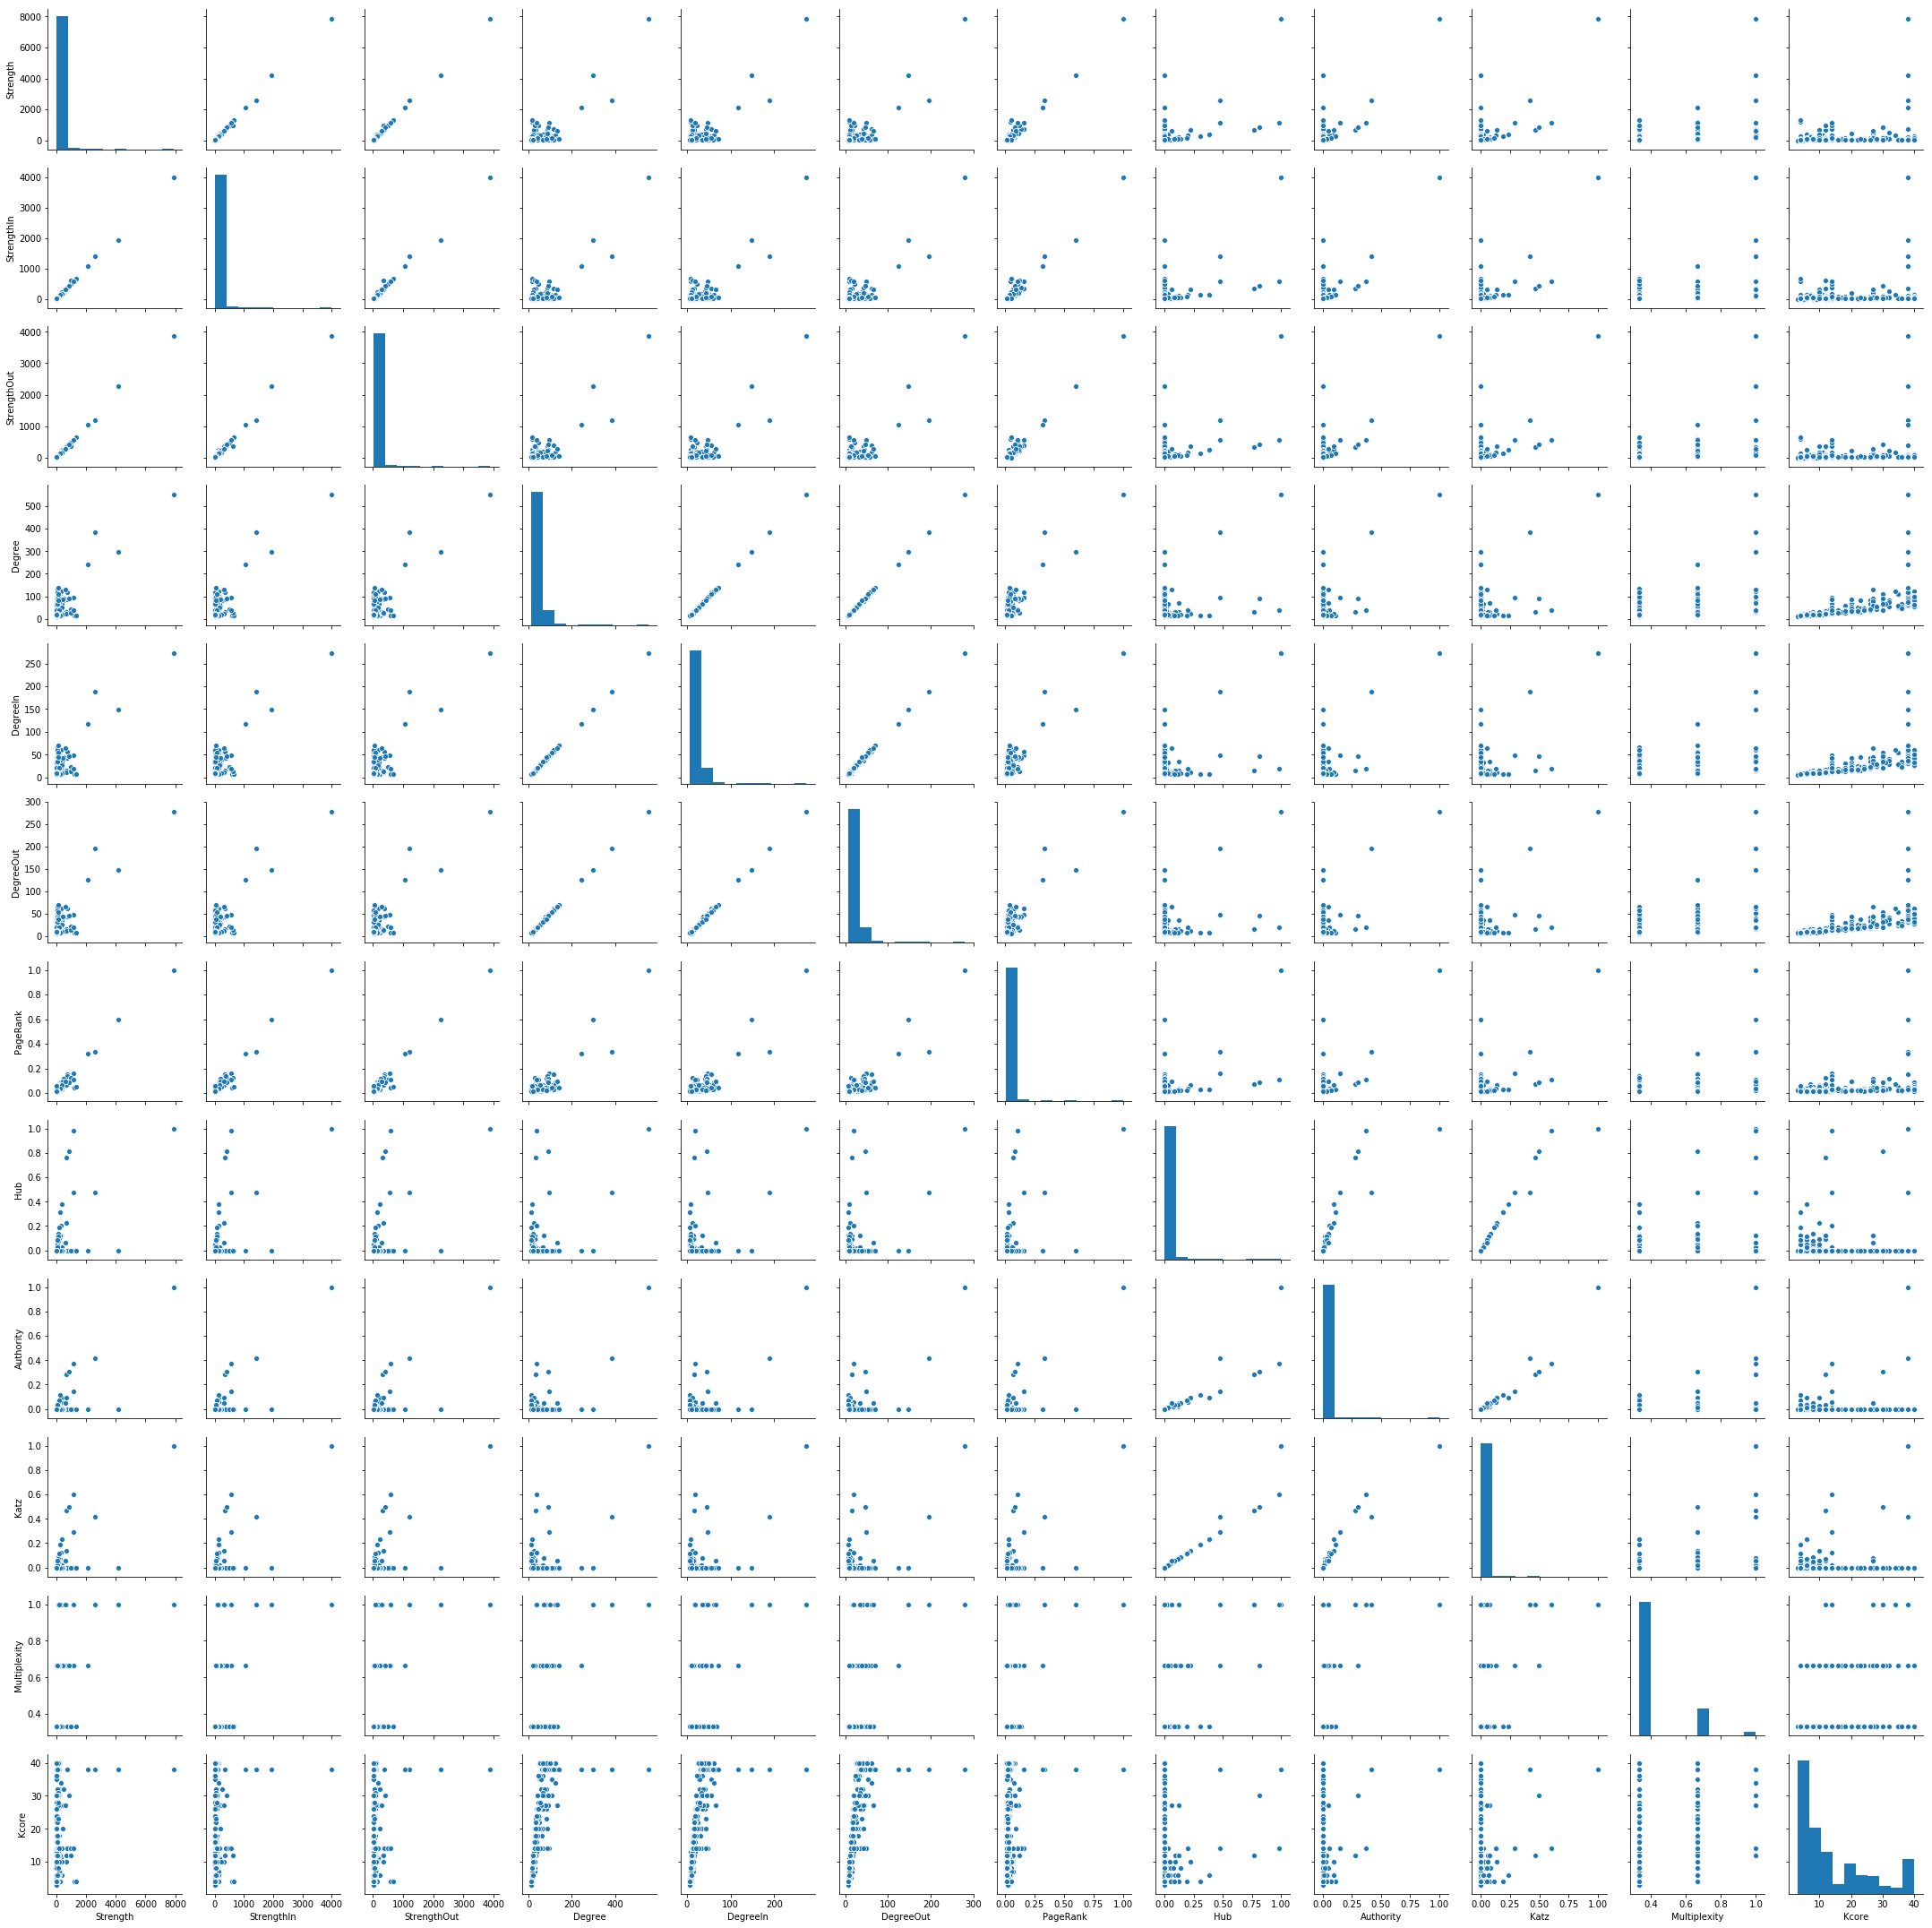

In [14]:
sns.pairplot(df_directed)

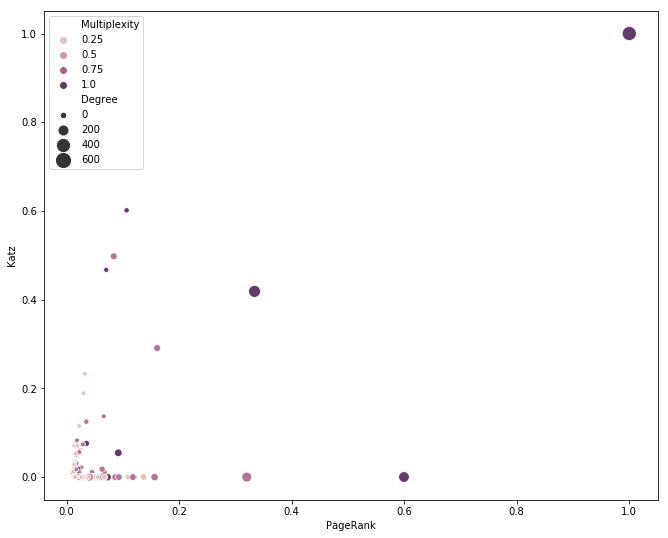

In [15]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="PageRank", y="Katz",
                     hue="Multiplexity", size="Degree",
                     sizes=(20, 200), palette=cmap,
                     legend="brief", data=df_directed)

In [28]:
# Create a trace
trace = go.Scatter(
    x = df_directed["PageRank"],
    y = df_directed["Katz"],
    mode = 'markers',
    text= df_directed['Label']
)

data = [trace]

# Plot and embed in ipython notebook!
#py.iplot(data)
# To see the above plot in interactive mode
plotly.offline.plot(data)

'file:///Users/andreas.yunus/Desktop/Graduation/temp-plot.html'

In [29]:
corr = df_directed.corr(method='pearson')

In [30]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

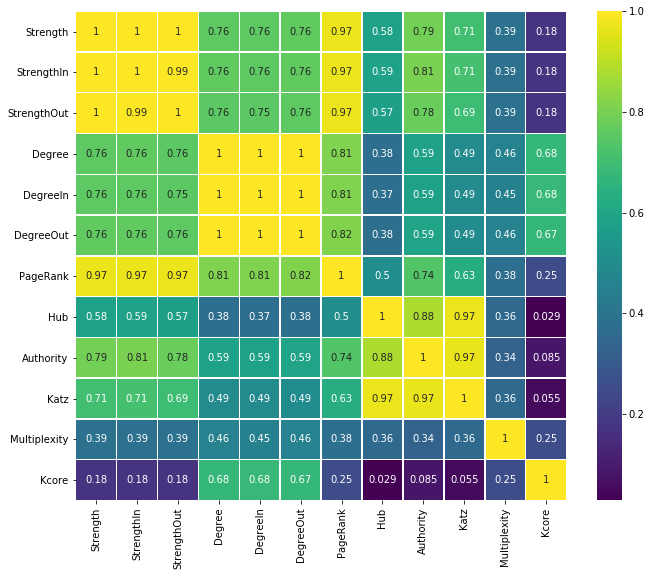

In [31]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap='viridis', linewidths=.5, annot=True)

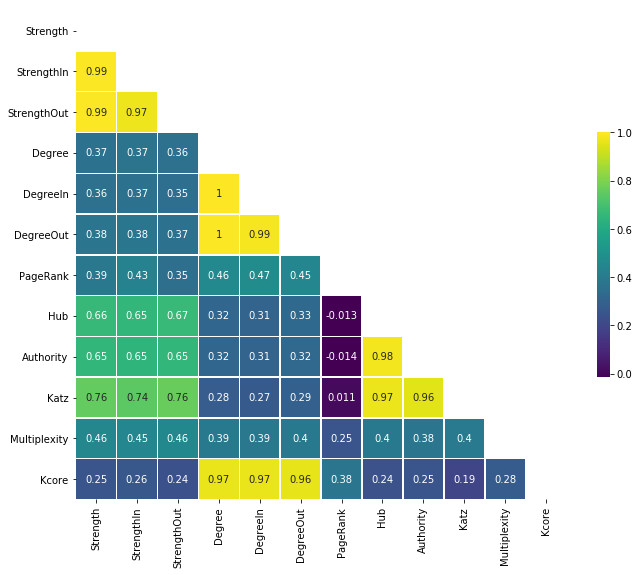

In [32]:
# Compute the correlation matrix
corr = df_directed.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

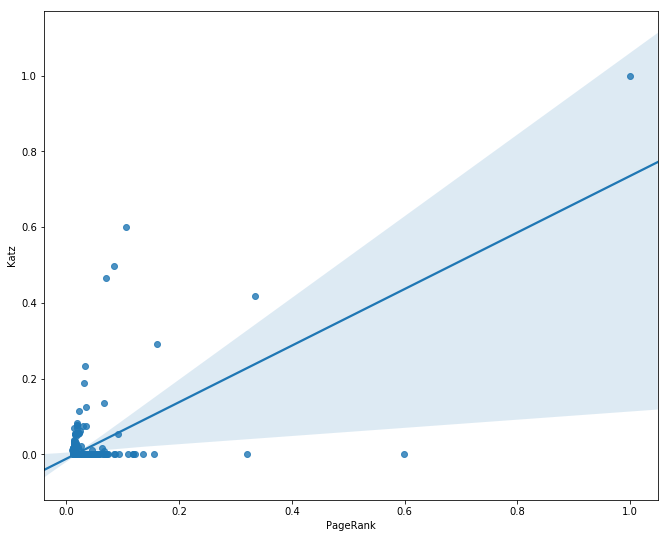

In [33]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.regplot(x="PageRank", y="Katz", data=df_directed, fit_reg=True)

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



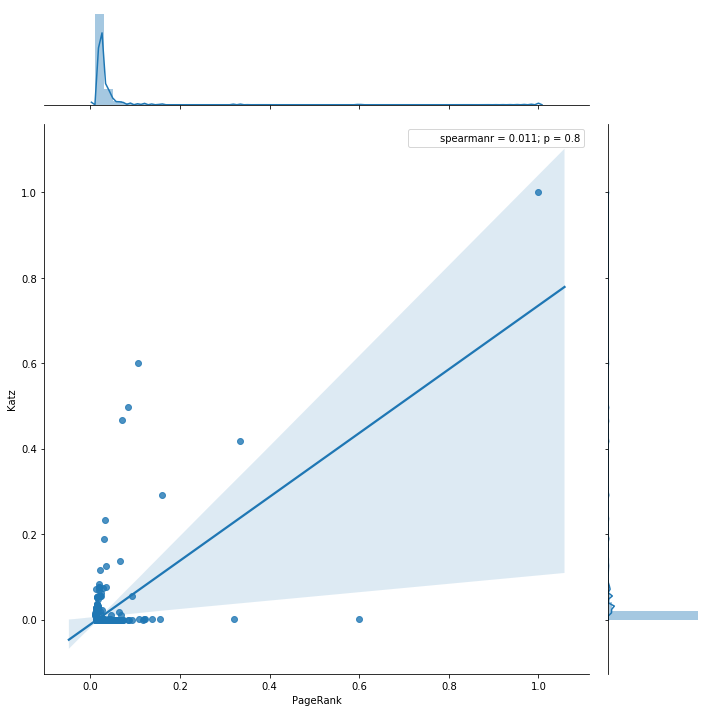

In [34]:
j = sns.jointplot(x='PageRank',y='Katz',data=df_directed, kind='reg', height= 10)
j.annotate(stats.spearmanr)

In [35]:
# Make list of column name
l_col = list(df_directed.columns[1:])

In [36]:
l_col

['Strength',
 'StrengthIn',
 'StrengthOut',
 'Degree',
 'DegreeIn',
 'DegreeOut',
 'PageRank',
 'Hub',
 'Authority',
 'Katz',
 'Multiplexity',
 'Kcore']

In [37]:
# Make blank dataframe
df_ks = pd.DataFrame(data=None, index=l_col, columns=l_col)

# Assign K-S distance to each metrics
#distance = list()
a = 0
b = 0
for i in range(len(l_col)):
    for j in range(len(l_col)):
        df_ks[l_col[j]][l_col[i]], b = np.float64(stats.ks_2samp(df_directed[l_col[i]], df_directed[l_col[j]]))
        #distance.append(a)

In [38]:
df_ks

,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Hub,Authority,Katz,Multiplexity,Kcore
Strength,0,0.353659,0.360627,0.247387,0.578397,0.574913,1,1,1,1,1,0.597561
StrengthIn,0.353659,0,0.0243902,0.388502,0.249129,0.252613,1,1,1,1,1,0.362369
StrengthOut,0.360627,0.0243902,0,0.393728,0.236934,0.231707,1,1,1,1,1,0.355401
Degree,0.247387,0.388502,0.393728,0,0.599303,0.595819,1,1,1,1,1,0.597561
DegreeIn,0.578397,0.249129,0.236934,0.599303,0,0.0121951,1,1,1,1,1,0.362369
DegreeOut,0.574913,0.252613,0.231707,0.595819,0.0121951,0,1,1,1,1,1,0.355401
PageRank,1,1,1,1,1,1,0,0.876307,0.907666,0.890244,0.994774,1
Hub,1,1,1,1,1,1,0.876307,0,0.0609756,0.733449,0.987805,1
Authority,1,1,1,1,1,1,0.907666,0.0609756,0,0.743902,0.994774,1
Katz,1,1,1,1,1,1,0.890244,0.733449,0.743902,0,0.991289,1


In [39]:
df_ks_2 = np.float64(df_ks)

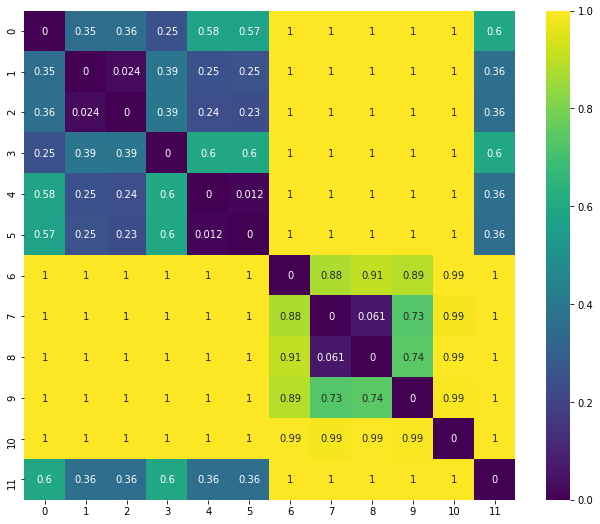

In [40]:
f, ax = plt.subplots(figsize=(11,9), nrows=1, ncols=1)
sns.heatmap(df_ks_2, cmap='viridis', annot=True)

In [41]:
df_ks_3 = pd.DataFrame(data=df_ks_2, index=l_col, columns=l_col)

Text(0.5, 1.0, 'Spearman Correlation')

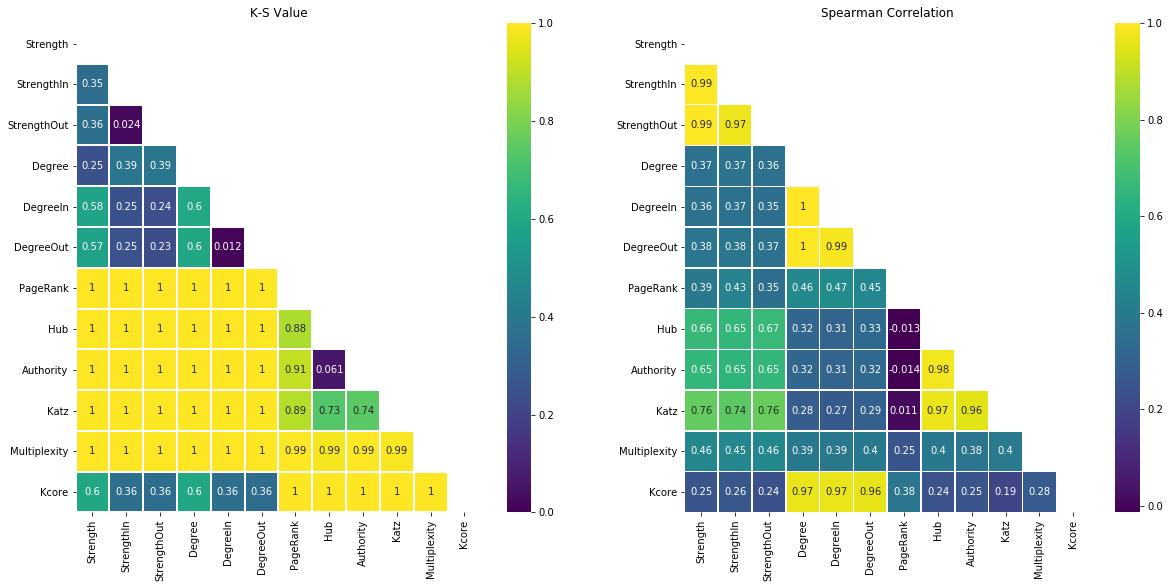

In [42]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_ks_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,9), nrows=1, ncols=2)

#plt.subplot(1,2,1)
sns.heatmap(df_ks_3, mask=mask, cmap = 'viridis', linewidths=1, annot=True, ax=ax[0])
ax[0].set_title('K-S Value')

#plt.subplot(1,2,2)
sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax[1])
ax[1].set_title('Spearman Correlation')

# Elimination of Overlapped Metrics

The elimination of overlapped metrics can be quantified by verifying the K-S value and Spearman Correlation

The reasoning of using spearman correlation - check actual documentation and paper: there are 3 requirements that cannot be fulfilled.

If K-S value is small, it means the distance between 2 distributions are small. Hence, there is possibility to have overlapping. Then, the next is checking the spearman correlation. If there is a high Spearman correlation, then one of the metric could be eliminated and another metric will supply complement information that is also supplied by the eliminated metric.

In [29]:
# Step 1
# StrengthIn vs StrengthOut
# Based on the table degree and strength has extremely small K-S value. Then, Spearman correlation also shows a
# very high correlation. Hence, we will delete the strengthOut.

# Since we delete the strength, strength in and strength out will be deleted because it shows similar info vs strength, strength in and out.

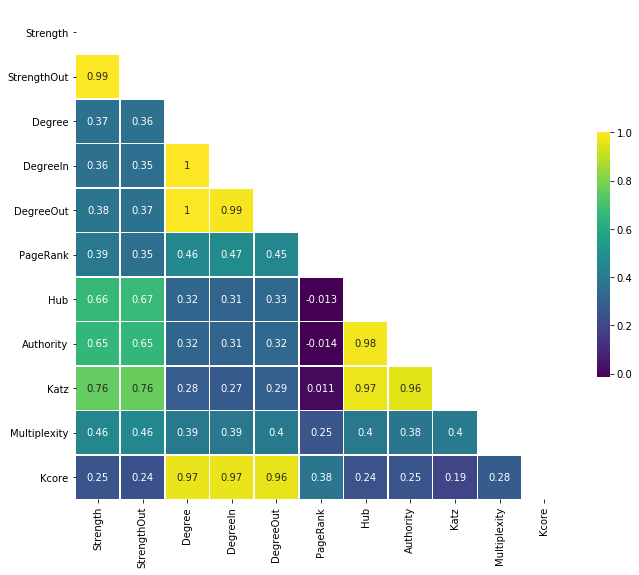

In [43]:
# Correlation Algorithm
# Drop strength, strength-in and out
df_directed.drop(labels=["StrengthIn"], axis=1, inplace=True)

# Compute the correlation matrix
corr = df_directed.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Text(0.5, 1.0, 'Spearman Correlation')

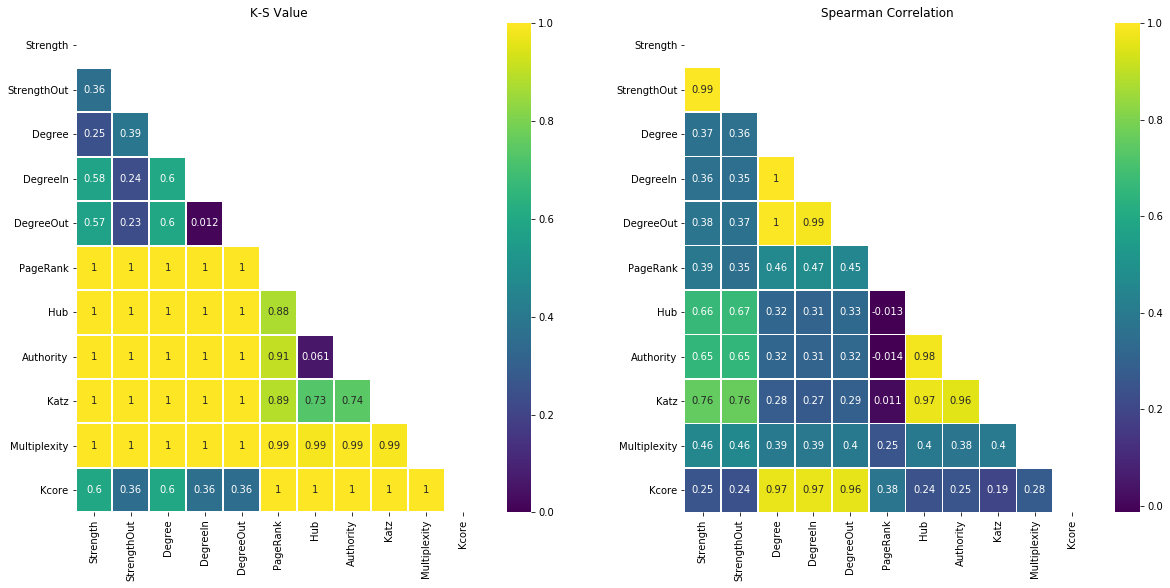

In [44]:
# K-S algorithm
# Make list of column name
l_col = list(df_directed.columns[1:])

# Make blank dataframe
df_ks = pd.DataFrame(data=None, index=l_col, columns=l_col)

# Assign K-S distance to each metrics
#distance = list()
a = 0
b = 0
for i in range(len(l_col)):
    for j in range(len(l_col)):
        df_ks[l_col[j]][l_col[i]], b = np.float64(stats.ks_2samp(df_directed[l_col[i]], df_directed[l_col[j]]))
        #distance.append(a)
        
# Change the datatype to float64
df_ks_2 = np.float64(df_ks)

# Put into new dataframe with column labels
df_ks_3 = pd.DataFrame(data=df_ks_2, index=l_col, columns=l_col)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_ks_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,9), nrows=1, ncols=2)

#plt.subplot(1,2,1)
sns.heatmap(df_ks_3, mask=mask, cmap = 'viridis', linewidths=1, annot=True, ax=ax[0])
ax[0].set_title('K-S Value')

#plt.subplot(1,2,2)
sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax[1])
ax[1].set_title('Spearman Correlation')

Text(0.5, 1.0, 'Spearman Correlation')

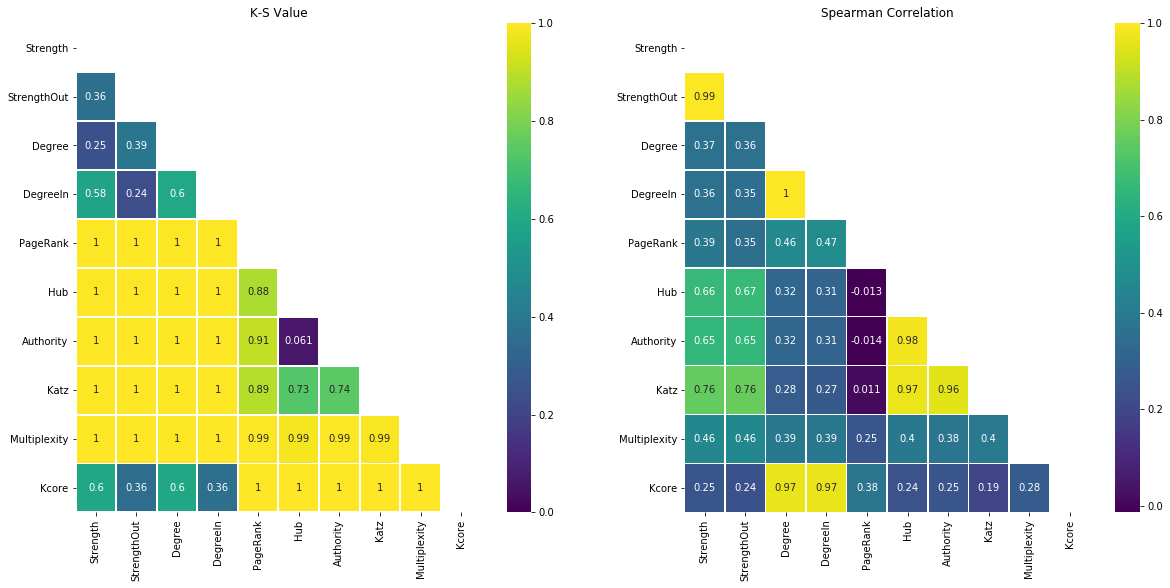

In [45]:
# Step 2
# Eliminate Degree-Out because of same reasoning
# Correlation Algorithm
# Drop Degree-Out
df_directed.drop(labels=["DegreeOut"], axis=1, inplace=True)

# Compute the correlation matrix
corr = df_directed.corr(method='spearman')

# K-S algorithm
# Make list of column name
l_col = list(df_directed.columns[1:])

# Make blank dataframe
df_ks = pd.DataFrame(data=None, index=l_col, columns=l_col)

# Assign K-S distance to each metrics
#distance = list()
a = 0
b = 0
for i in range(len(l_col)):
    for j in range(len(l_col)):
        df_ks[l_col[j]][l_col[i]], b = np.float64(stats.ks_2samp(df_directed[l_col[i]], df_directed[l_col[j]]))
        #distance.append(a)
        
# Change the datatype to float64
df_ks_2 = np.float64(df_ks)

# Put into new dataframe with column labels
df_ks_3 = pd.DataFrame(data=df_ks_2, index=l_col, columns=l_col)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_ks_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,9), nrows=1, ncols=2)

#plt.subplot(1,2,1)
sns.heatmap(df_ks_3, mask=mask, cmap = 'viridis', linewidths=1, annot=True, ax=ax[0])
ax[0].set_title('K-S Value')

#plt.subplot(1,2,2)
sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax[1])
ax[1].set_title('Spearman Correlation')

Text(0.5, 1.0, 'Spearman Correlation')

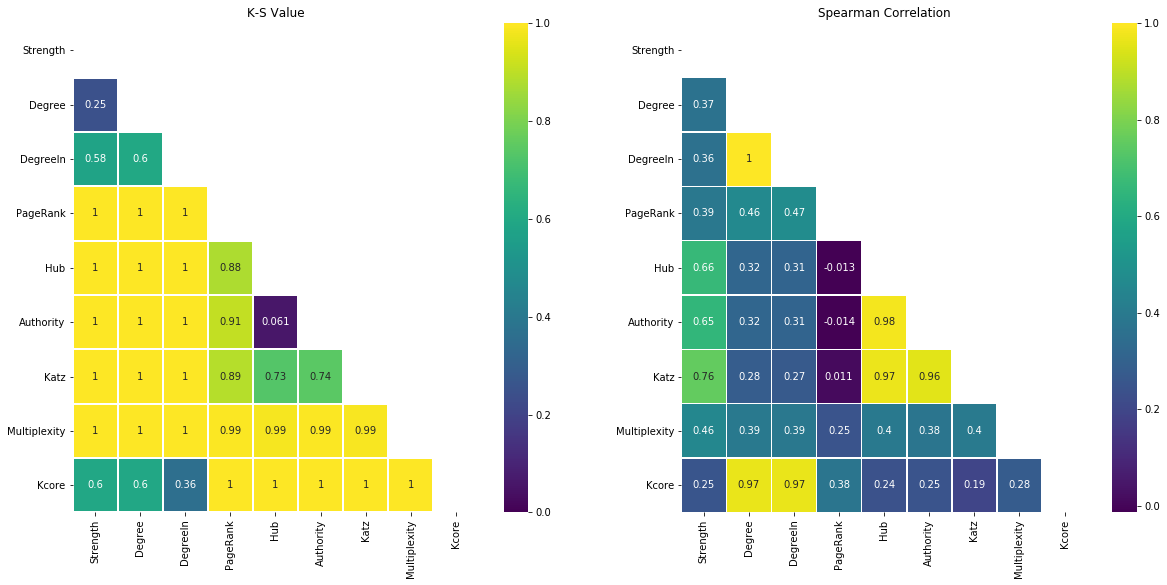

In [46]:
# Step 3 - Strength vs StrengthOut

df_directed.drop(labels=["StrengthOut"], axis=1, inplace=True)

# Compute the correlation matrix
corr = df_directed.corr(method='spearman')

# K-S algorithm
# Make list of column name
l_col = list(df_directed.columns[1:])

# Make blank dataframe
df_ks = pd.DataFrame(data=None, index=l_col, columns=l_col)

# Assign K-S distance to each metrics
#distance = list()
a = 0
b = 0
for i in range(len(l_col)):
    for j in range(len(l_col)):
        df_ks[l_col[j]][l_col[i]], b = np.float64(stats.ks_2samp(df_directed[l_col[i]], df_directed[l_col[j]]))
        #distance.append(a)
        
# Change the datatype to float64
df_ks_2 = np.float64(df_ks)

# Put into new dataframe with column labels
df_ks_3 = pd.DataFrame(data=df_ks_2, index=l_col, columns=l_col)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_ks_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,9), nrows=1, ncols=2)

#plt.subplot(1,2,1)
sns.heatmap(df_ks_3, mask=mask, cmap = 'viridis', linewidths=1, annot=True, ax=ax[0])
ax[0].set_title('K-S Value')

#plt.subplot(1,2,2)
sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax[1])
ax[1].set_title('Spearman Correlation')

Text(0.5, 1.0, 'Spearman Correlation')

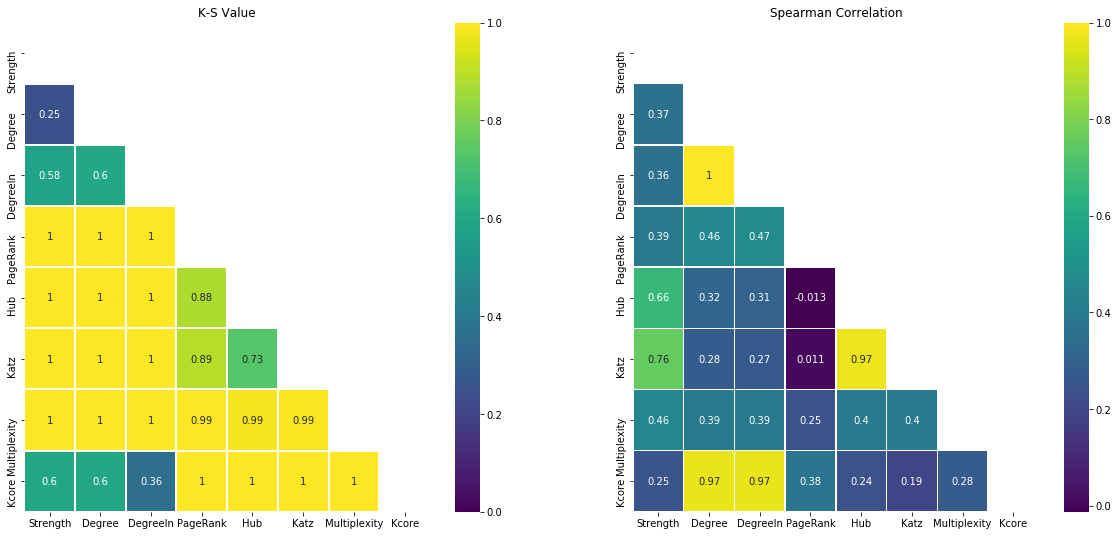

In [47]:
# Step 4 - Authority vs Hubs

# Authority means Description
# The authority scores of the vertices are defined as the principal eigenvector of t(A)*A, 
# where A is the adjacency matrix of the graph.
# https://igraph.org/r/doc/authority_score.html
# Elimination of authority
# Drop authority

df_directed.drop(labels=["Authority"], axis=1, inplace=True)

# Compute the correlation matrix
corr = df_directed.corr(method='spearman')

# K-S algorithm
# Make list of column name
l_col = list(df_directed.columns[1:])

# Make blank dataframe
df_ks = pd.DataFrame(data=None, index=l_col, columns=l_col)

# Assign K-S distance to each metrics
#distance = list()
a = 0
b = 0
for i in range(len(l_col)):
    for j in range(len(l_col)):
        df_ks[l_col[j]][l_col[i]], b = np.float64(stats.ks_2samp(df_directed[l_col[i]], df_directed[l_col[j]]))
        #distance.append(a)
        
# Change the datatype to float64
df_ks_2 = np.float64(df_ks)

# Put into new dataframe with column labels
df_ks_3 = pd.DataFrame(data=df_ks_2, index=l_col, columns=l_col)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_ks_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,9), nrows=1, ncols=2)

#plt.subplot(1,2,1)
sns.heatmap(df_ks_3, mask=mask, cmap = 'viridis', linewidths=1, annot=True, ax=ax[0])
ax[0].set_title('K-S Value')

#plt.subplot(1,2,2)
sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax[1])
ax[1].set_title('Spearman Correlation')

Text(0.5, 1.0, 'Spearman Correlation')

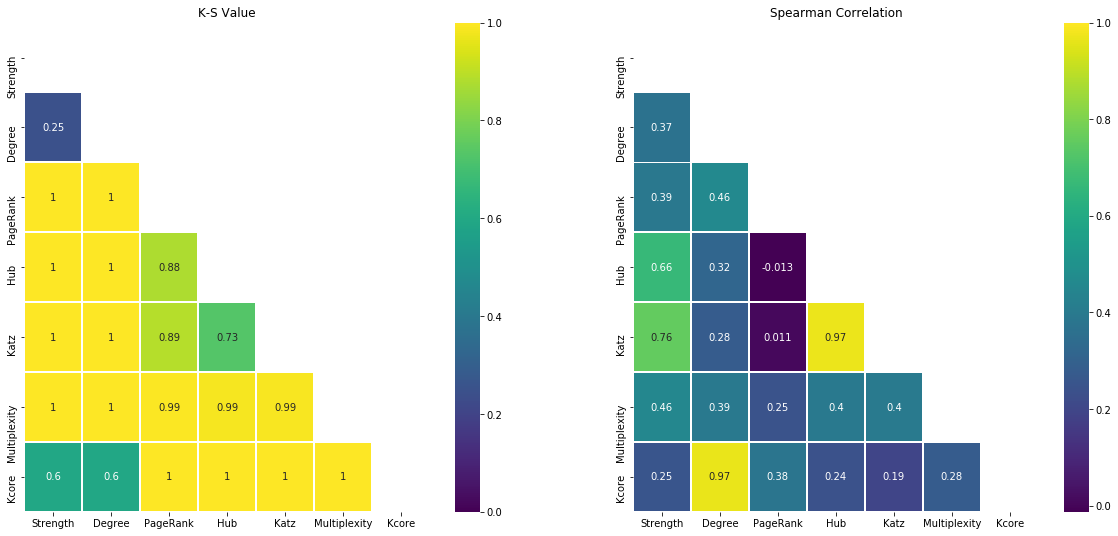

In [48]:
# Step 5 - Degree and DegreeIn
# Hubs and authorities are a natural generalization of eigenvector centrality.
# http://www.analytictech.com/ucinet/help/hs4200.htm
# Elimination of Hub centrality
# Drop Hub

# https://www.sci.unich.it/~francesc/teaching/network/katz.html
# Elimination of Katz
# Katz centrality was constructed for weak connected network - in case there is 0 value in eigenvector.
# Hence, it assigned some small centrality values for free to a node that can be transferred to another node.
# Drop Katz
df_directed.drop(labels=["DegreeIn"], axis=1, inplace=True)

# Compute the correlation matrix
corr = df_directed.corr(method='spearman')

# K-S algorithm
# Make list of column name
l_col = list(df_directed.columns[1:])

# Make blank dataframe
df_ks = pd.DataFrame(data=None, index=l_col, columns=l_col)

# Assign K-S distance to each metrics
#distance = list()
a = 0
b = 0
for i in range(len(l_col)):
    for j in range(len(l_col)):
        df_ks[l_col[j]][l_col[i]], b = np.float64(stats.ks_2samp(df_directed[l_col[i]], df_directed[l_col[j]]))
        #distance.append(a)
        
# Change the datatype to float64
df_ks_2 = np.float64(df_ks)

# Put into new dataframe with column labels
df_ks_3 = pd.DataFrame(data=df_ks_2, index=l_col, columns=l_col)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_ks_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,9), nrows=1, ncols=2)

#plt.subplot(1,2,1)
sns.heatmap(df_ks_3, mask=mask, cmap = 'viridis', linewidths=1, annot=True, ax=ax[0])
ax[0].set_title('K-S Value')

#plt.subplot(1,2,2)
sns.heatmap(corr, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax[1])
ax[1].set_title('Spearman Correlation')

In [ ]:
# K-Core
# a network is represented by different type of edges.

# Ranking Validation

In [49]:
# Rank the ports based on Borda Count Methods
# Preference-based Ranking

In [50]:
# List of Busiest Port in Europe as per TEU in 2018. No data for 2019
# https://www.porteconomics.eu/2019/03/02/portgraphic-top15-container-ports-in-europe-in-2018/

In [51]:
# Make dictionary
port_teu_dict = {"Ports":["Rotterdam", "Antwerp", "Hamburg", 
            "Bremerhaven", "Valencia", "Piraeus",
           "Algeciras", "Felixstowe", "Barcelona",
           "Marsaxlokk", "Le_Havre", "Genoa",
           "Gioia_Tauro", "Southampton","Gdansk"], "TEU":[14513,11100,8730,5467,5104,4908,4772,4161,3423,3310,2884,2609,2301,1995,1949]}

In [52]:
port_teu = pd.DataFrame.from_dict(data=port_teu_dict)

In [53]:
df_directed.set_index('Label', inplace=True)

In [54]:
list(port_teu_dict['Ports'])

['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le_Havre',
 'Genoa',
 'Gioia_Tauro',
 'Southampton',
 'Gdansk']

In [55]:
df_top15 = df_directed.loc[list(port_teu_dict['Ports'])]

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [56]:
df_top15

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore
Label,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0
Valencia,96.102738,140.0,0.040388,9.037884e-06,0.000021,0.666667,38.0
Piraeus,91.124582,133.0,0.046125,7.286036e-06,0.000019,0.333333,38.0
Algeciras,79.307762,109.0,0.047220,4.266415e-06,0.000016,0.666667,35.0
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0
Barcelona,101.515167,110.0,0.040308,6.460290e-06,0.000018,0.666667,38.0


In [57]:
# Remove Genoa from list - data not available - NaN
df_top15.dropna(inplace=True)

In [58]:
port_teu

,Ports,TEU
0,Rotterdam,14513
1,Antwerp,11100
2,Hamburg,8730
3,Bremerhaven,5467
4,Valencia,5104
5,Piraeus,4908
6,Algeciras,4772
7,Felixstowe,4161
8,Barcelona,3423
9,Marsaxlokk,3310


In [59]:
# Remove genoa TEU
genoa = list(port_teu['TEU'])
genoa.pop(11)
genoa

[14513,
 11100,
 8730,
 5467,
 5104,
 4908,
 4772,
 4161,
 3423,
 3310,
 2884,
 2301,
 1995,
 1949]

In [ ]:
df_top15['TEU'] = genoa

In [65]:
df_top15

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0,14513
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0,11100
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0,8730
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0,5467
Valencia,96.102738,140.0,0.040388,9.037884e-06,0.000021,0.666667,38.0,5104
Piraeus,91.124582,133.0,0.046125,7.286036e-06,0.000019,0.333333,38.0,4908
Algeciras,79.307762,109.0,0.047220,4.266415e-06,0.000016,0.666667,35.0,4772
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0,4161
Barcelona,101.515167,110.0,0.040308,6.460290e-06,0.000018,0.666667,38.0,3423


# Check Ranking

In [66]:
# 20 top ports based on Degree
df_top15.sort_values(by='Degree', ascending=False)

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0,14513
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0,11100
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0,8730
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0,5467
Valencia,96.102738,140.0,0.040388,9.037884e-06,0.000021,0.666667,38.0,5104
Piraeus,91.124582,133.0,0.046125,7.286036e-06,0.000019,0.333333,38.0,4908
Le_Havre,316.733923,122.0,0.072671,1.072242e-05,0.000021,1.000000,34.0,2884
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0,4161
Barcelona,101.515167,110.0,0.040308,6.460290e-06,0.000018,0.666667,38.0,3423


In [67]:
df_top15_degree = df_top15.sort_values(by='Degree', ascending=False).index

In [68]:
# 20 top ports based on PageRank
df_top15.sort_values(by='PageRank', ascending=False)

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0,14513
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0,8730
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0,11100
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0,5467
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0,4161
Le_Havre,316.733923,122.0,0.072671,1.072242e-05,0.000021,1.000000,34.0,2884
Southampton,187.032262,83.0,0.047395,2.142795e-05,0.000032,0.666667,38.0,1995
Algeciras,79.307762,109.0,0.047220,4.266415e-06,0.000016,0.666667,35.0,4772
Piraeus,91.124582,133.0,0.046125,7.286036e-06,0.000019,0.333333,38.0,4908


In [69]:
df_top15_PageRank = df_top15.sort_values(by='PageRank', ascending=False).index

In [70]:
# 20 top ports based on Strength
df_top15.sort_values(by='Strength', ascending=False)

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0,14513
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0,8730
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0,11100
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0,5467
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0,4161
Le_Havre,316.733923,122.0,0.072671,1.072242e-05,0.000021,1.000000,34.0,2884
Southampton,187.032262,83.0,0.047395,2.142795e-05,0.000032,0.666667,38.0,1995
Barcelona,101.515167,110.0,0.040308,6.460290e-06,0.000018,0.666667,38.0,3423
Valencia,96.102738,140.0,0.040388,9.037884e-06,0.000021,0.666667,38.0,5104


In [71]:
df_top15_strength = df_top15.sort_values(by='Strength', ascending=False).index

In [72]:
# 20 top ports based on Multiplexity
df_top15.sort_values(by='Multiplexity', ascending=False)

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0,14513
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0,11100
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0,8730
Le_Havre,316.733923,122.0,0.072671,1.072242e-05,0.000021,1.000000,34.0,2884
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0,5467
Valencia,96.102738,140.0,0.040388,9.037884e-06,0.000021,0.666667,38.0,5104
Algeciras,79.307762,109.0,0.047220,4.266415e-06,0.000016,0.666667,35.0,4772
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0,4161
Barcelona,101.515167,110.0,0.040308,6.460290e-06,0.000018,0.666667,38.0,3423


In [73]:
df_top15_multiplexity = df_top15.sort_values(by='Multiplexity', ascending=False).index

In [74]:
# 20 top ports based on KCore
df_top15.sort_values(by='Kcore', ascending=False)

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0,14513
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0,11100
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0,8730
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0,5467
Valencia,96.102738,140.0,0.040388,9.037884e-06,0.000021,0.666667,38.0,5104
Piraeus,91.124582,133.0,0.046125,7.286036e-06,0.000019,0.333333,38.0,4908
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0,4161
Barcelona,101.515167,110.0,0.040308,6.460290e-06,0.000018,0.666667,38.0,3423
Marsaxlokk,66.358646,103.0,0.044855,2.859760e-06,0.000014,0.333333,38.0,3310


In [75]:
df_top15_Kcore = df_top15.sort_values(by='Kcore', ascending=False).index

In [76]:
df_top15_Kcore

Index(['Rotterdam', 'Antwerp', 'Hamburg', 'Bremerhaven', 'Valencia', 'Piraeus',
       'Felixstowe', 'Barcelona', 'Marsaxlokk', 'Southampton', 'Gioia_Tauro',
       'Algeciras', 'Le_Havre', 'Gdansk'],
      dtype='object', name='Label')

In [77]:
df_top15_TEU = df_top15.index

In [78]:
# 20 top ports based on Hub
df_top15.sort_values(by='Hub', ascending=False)

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0,14513
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0,11100
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0,8730
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0,5467
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0,4161
Southampton,187.032262,83.0,0.047395,2.142795e-05,0.000032,0.666667,38.0,1995
Le_Havre,316.733923,122.0,0.072671,1.072242e-05,0.000021,1.000000,34.0,2884
Valencia,96.102738,140.0,0.040388,9.037884e-06,0.000021,0.666667,38.0,5104
Gdansk,87.203968,46.0,0.026505,8.971630e-06,0.000021,0.666667,23.0,1949


In [79]:
df_top15_hub = df_top15.sort_values(by='Hub', ascending=False).index

In [80]:
# 20 top ports based on Katz
df_top15.sort_values(by='Katz', ascending=False)

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0,14513
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0,11100
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0,8730
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0,5467
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0,4161
Southampton,187.032262,83.0,0.047395,2.142795e-05,0.000032,0.666667,38.0,1995
Le_Havre,316.733923,122.0,0.072671,1.072242e-05,0.000021,1.000000,34.0,2884
Valencia,96.102738,140.0,0.040388,9.037884e-06,0.000021,0.666667,38.0,5104
Gdansk,87.203968,46.0,0.026505,8.971630e-06,0.000021,0.666667,23.0,1949


In [81]:
df_top15_katz = df_top15.sort_values(by='Katz', ascending=False).index

# Borda Count Algorithm

Add citation. This function is part of mlpy (machine learning for Python) package. However, due to problem in package installation. This source code was copied from the library

In [82]:
# Algorithm
# Give numbering on rank order starting from 1 to 14
# The least sum has the biggest rank

In [83]:
list(df_top15_degree)

['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Le_Havre',
 'Felixstowe',
 'Barcelona',
 'Algeciras',
 'Marsaxlokk',
 'Southampton',
 'Gioia_Tauro',
 'Gdansk']

In [85]:
dict_degree = {df_top15_degree[x]:x+1 for x in range(len(df_top15_degree))}
dict_PageRank = {df_top15_PageRank[x]:x+1 for x in range(len(df_top15_PageRank))}
dict_strength = {df_top15_strength[x]:x+1 for x in range(len(df_top15_strength))}
#dict_multiplexity = {df_top15_multiplexity[x]:x+1 for x in range(len(df_top15_multiplexity))}
#dict_kcore = {df_top15_Kcore[x]:x+1 for x in range(len(df_top15_Kcore))}
dict_TEU = {df_top15_TEU[x]:x+1 for x in range(len(df_top15_TEU))}

In [86]:
# Set rank multiplexity - algorithm is different because there is same value
set_multiplexity = sorted(list(set(df_top15['Multiplexity'])), reverse=True)
dict_rank_multiplexity = {set_multiplexity[x]:x+1 for x in range(len(set_multiplexity))}
dict_multiplexity = {df_top15_multiplexity[x]:dict_rank_multiplexity[df_top15['Multiplexity'][x]] for x in range(len(df_top15_multiplexity))}

In [87]:
# Set rank kcore - algorithm is different because there is same value
set_kcore = sorted(list(set(df_top15['Kcore'])), reverse=True)
dict_rank_kcore = {set_kcore[x]:x+1 for x in range(len(set_kcore))}
dict_kcore = {df_top15_Kcore[x]:dict_rank_kcore[df_top15['Kcore'][x]] for x in range(len(df_top15_Kcore))}

In [88]:
dict_hub = {df_top15_hub[x]:x+1 for x in range(len(df_top15_hub))}

# Set rank Katz - algorithm is different because there is same value
set_katz = sorted(list(set(df_top15['Katz'])), reverse=True)
dict_rank_katz = {set_katz[x]:x+1 for x in range(len(set_katz))}
dict_katz = {df_top15_katz[x]:dict_rank_katz[df_top15['Katz'][x]] for x in range(len(df_top15_katz))}

In [89]:
# Batasan

In [90]:
df15_index = list(df_top15.index)

In [91]:
dict_borda = dict()
for i, j in enumerate(df15_index):
    dict_borda[j] = dict_degree[j] + dict_PageRank[j] + dict_strength[j] + dict_multiplexity[j] + dict_kcore[j] + dict_TEU[j] + dict_hub[j] + dict_katz[j]

In [92]:
dict_borda

{'Algeciras': 67,
 'Antwerp': 16,
 'Barcelona': 59,
 'Bremerhaven': 27,
 'Felixstowe': 44,
 'Gdansk': 78,
 'Gioia_Tauro': 82,
 'Hamburg': 18,
 'Le_Havre': 52,
 'Marsaxlokk': 66,
 'Piraeus': 58,
 'Rotterdam': 8,
 'Southampton': 59,
 'Valencia': 47}

In [93]:
print(dict_borda.items())

dict_items([('Rotterdam', 8), ('Antwerp', 16), ('Hamburg', 18), ('Bremerhaven', 27), ('Valencia', 47), ('Piraeus', 58), ('Algeciras', 67), ('Felixstowe', 44), ('Barcelona', 59), ('Marsaxlokk', 66), ('Le_Havre', 52), ('Gioia_Tauro', 82), ('Southampton', 59), ('Gdansk', 78)])


In [94]:
list(dict_borda.keys())

['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le_Havre',
 'Gioia_Tauro',
 'Southampton',
 'Gdansk']

In [95]:
df_sorted_borda = pd.DataFrame(columns=['Borda_count'], index=list(dict_borda.keys()))

In [96]:
for i, j in dict_borda.items():
    df_sorted_borda.loc[i] = j

In [97]:
df_sorted_borda.sort_values(by='Borda_count')

,Borda_count
Rotterdam,8
Antwerp,16
Hamburg,18
Bremerhaven,27
Felixstowe,44
Valencia,47
Le_Havre,52
Piraeus,58
Barcelona,59
Southampton,59


# Check Ports in Tail Distribution

In [98]:
# Check the Ports in Tail Distribution based on each Centrality Measures
# Rank it
# Use Borda Count again

In [99]:
# Use IQR method because standard deviation and mean will be affected by skewed distribution

In [100]:
df_top15

,Strength,Degree,PageRank,Hub,Katz,Multiplexity,Kcore,TEU
Label,,,,,,,,
Rotterdam,7879.745066,553.0,1.000000,1.000000e+00,1.000000,1.000000,38.0,14513
Antwerp,2608.992152,384.0,0.333978,4.728276e-01,0.418688,1.000000,38.0,11100
Hamburg,4188.237744,297.0,0.599613,6.788377e-04,0.000277,1.000000,38.0,8730
Bremerhaven,2123.600104,243.0,0.320176,2.847433e-04,0.000136,0.666667,38.0,5467
Valencia,96.102738,140.0,0.040388,9.037884e-06,0.000021,0.666667,38.0,5104
Piraeus,91.124582,133.0,0.046125,7.286036e-06,0.000019,0.333333,38.0,4908
Algeciras,79.307762,109.0,0.047220,4.266415e-06,0.000016,0.666667,35.0,4772
Felixstowe,737.093542,117.0,0.156323,6.216496e-05,0.000077,0.666667,38.0,4161
Barcelona,101.515167,110.0,0.040308,6.460290e-06,0.000018,0.666667,38.0,3423


In [102]:
degree_sorted = sorted(df_directed['Degree'])
PageRank_sorted = sorted(df_directed['PageRank'])
strength_sorted = sorted(df_directed['Strength'])
multiplexity_sorted = sorted(df_directed['Multiplexity'])
kcore_sorted = sorted(df_directed['Kcore'])
hub_sorted = sorted(df_directed['Hub'])
katz_sorted = sorted(df_directed['Katz'])

In [103]:
q1, q3 = np.percentile(degree_sorted,[25,75])
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
degree_sorted_list = list(df_directed[df_directed["Degree"] > upper_bound].index)

In [104]:
q1, q3 = np.percentile(PageRank_sorted,[25,75])
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
PageRank_sorted_list = list(df_directed[df_directed["PageRank"] > upper_bound].index)

In [105]:
q1, q3 = np.percentile(strength_sorted,[25,75])
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
strength_sorted_list = list(df_directed[df_directed["Strength"] > upper_bound].index)

In [106]:
q1, q3 = np.percentile(multiplexity_sorted,[25,75])
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
multiplexity_sorted_list = list(df_directed[df_directed["Multiplexity"] > upper_bound].index)

In [107]:
q1, q3 = np.percentile(kcore_sorted,[25,75])
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
kcore_sorted_list = list(df_directed[df_directed["Kcore"] > upper_bound].index)

In [108]:
q1, q3 = np.percentile(hub_sorted,[25,75])
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
hub_sorted_list = list(df_directed[df_directed["Hub"] > upper_bound].index)

In [109]:
q1, q3 = np.percentile(katz_sorted,[25,75])
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
katz_sorted_list = list(df_directed[df_directed["Katz"] > upper_bound].index)

In [110]:
# Getting borda index to be checked whether it's part of tail distribution?
borda_list = list(df_sorted_borda.index)

In [111]:
borda_list

['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le_Havre',
 'Gioia_Tauro',
 'Southampton',
 'Gdansk']

In [112]:
df_directed.loc['Gdansk']

Strength        87.203968
Degree          46.000000
PageRank         0.026505
Hub              0.000009
Katz             0.000021
Multiplexity     0.666667
Kcore           23.000000
Name: Gdansk, dtype: float64

In [113]:
df_directed.loc['Gioia_Tauro']

Strength        1.795552e+01
Degree          5.400000e+01
PageRank        1.540592e-02
Hub             2.139944e-07
Katz            1.201491e-05
Multiplexity    3.333333e-01
Kcore           3.600000e+01
Name: Gioia_Tauro, dtype: float64

In [114]:
# New algorithm - for getting the list of the port that is not in tail distribution

In [115]:
# Degree tail distribution
tail_degree = list()
if (borda_list <= degree_sorted_list) == False:
    for i in range(len(borda_list)):
        if (borda_list[i] in degree_sorted_list) == False:
            tail_degree.append(borda_list[i])

In [116]:
# PageRank tail distribution
tail_PageRank = list()
if (borda_list <= PageRank_sorted_list) == False:
    for i in range(len(borda_list)):
        if (borda_list[i] in PageRank_sorted_list) == False:
            tail_PageRank.append(borda_list[i])

In [120]:
# Eigenvector tail distribution
tail_strength = list()
if (borda_list <= strength_sorted_list) == False:
    for i in range(len(borda_list)):
        if (borda_list[i] in strength_sorted_list) == False:
            tail_strength.append(borda_list[i])

In [118]:
# Multiplexity tail distribution
tail_multiplexity = list()
if (borda_list <= multiplexity_sorted_list) == False:
    for i in range(len(borda_list)):
        if (borda_list[i] in multiplexity_sorted_list) == False:
            tail_multiplexity.append(borda_list[i])

In [119]:
# K-Core tail distribution
tail_kcore = list()
if (borda_list <= kcore_sorted_list) == False:
    for i in range(len(borda_list)):
        if (borda_list[i] in kcore_sorted_list) == False:
            tail_kcore.append(borda_list[i])

In [121]:
tail_hub = list()
if (borda_list <= hub_sorted_list) == False:
    for i in range(len(borda_list)):
        if (borda_list[i] in hub_sorted_list) == False:
            tail_hub.append(borda_list[i])

In [122]:
tail_katz = list()
if (borda_list <= katz_sorted_list) == False:
    for i in range(len(borda_list)):
        if (borda_list[i] in katz_sorted_list) == False:
            tail_katz.append(borda_list[i])

In [123]:
tail_degree

['Gioia_Tauro', 'Gdansk']

In [124]:
tail_PageRank

['Valencia', 'Barcelona', 'Marsaxlokk', 'Gioia_Tauro', 'Gdansk']

In [125]:
tail_strength

['Valencia',
 'Piraeus',
 'Algeciras',
 'Barcelona',
 'Marsaxlokk',
 'Gioia_Tauro',
 'Gdansk']

In [126]:
tail_multiplexity

['Piraeus', 'Marsaxlokk', 'Gioia_Tauro']

In [127]:
tail_kcore

['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le_Havre',
 'Gioia_Tauro',
 'Southampton',
 'Gdansk']

In [128]:
tail_hub

['Valencia',
 'Piraeus',
 'Algeciras',
 'Barcelona',
 'Marsaxlokk',
 'Le_Havre',
 'Gioia_Tauro',
 'Southampton',
 'Gdansk']

In [129]:
tail_katz

['Valencia',
 'Piraeus',
 'Algeciras',
 'Barcelona',
 'Marsaxlokk',
 'Le_Havre',
 'Gioia_Tauro',
 'Southampton',
 'Gdansk']

In [159]:
# Set of tail degree
tail_complete = list(tail_degree + tail_strength + tail_hub + tail_katz + tail_kcore + tail_multiplexity + tail_PageRank)

In [160]:
import collections

counter=collections.Counter(tail_complete)
print(counter)

Counter({'Gioia_Tauro': 7, 'Gdansk': 6, 'Marsaxlokk': 6, 'Valencia': 5, 'Piraeus': 5, 'Barcelona': 5, 'Algeciras': 4, 'Le_Havre': 3, 'Southampton': 3, 'Rotterdam': 1, 'Antwerp': 1, 'Hamburg': 1, 'Bremerhaven': 1, 'Felixstowe': 1})


In [161]:
# Delete top two? Gdansk and Gioia Tauro?

In [ ]:
# Check subset
# based on the result: Gdansk and Gioia Tauro will be eliminated from the list
# Both of those ports are not critical because it's not included in tail distribution. Hence, not a critical port
# Not a big hub

In [ ]:
# Bikin dokumentasi flow of centrality analysis procedure
# Terakhir adalah elimination 2 ports from the complete rank

In [ ]:
# Urutan flow of procedure centrality analysis
# 1. Make the complete directed centrality analysis for all ports in MuxViz
# 2. Construct complete centrality metrics - some of metrics are overlapped and not necessary
# 3. Check the distribution of each metric - skewed or normal distribution?
# 4. Construct Spearman correlation - due to skewed distribution
# 5. Construct K-S value for all metrics
# 6. Elimination of overlapped metrics
# 7. Check the top 15 ranking of each metrics - found that the list is a bit random and finding the subset are difficult
#   Adding information and filter by focusing on top 15 ports based on TEU
# 8. Perform preference-based ranking - Borda Count to evaluate the combination of metrics rank
# 9. Check the outliers and do elimination of non-outliers in borda list because those ports are not hubs

In [ ]:
# TO DO: PCA FOR WEIGHTED LINKS

In [ ]:
# so the hubs are
hubs = list(df_sorted_borda.index)

In [ ]:
hubs.pop(11)

In [ ]:
hubs.pop(12)

In [ ]:
hubs

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="PageRank", y="Eigenvector",
                     hue="Multiplexity", size="Degree",
                     sizes=(20, 200), palette=cmap,
                     legend="brief", data=df_top15)

In [ ]:
# batasan - apus algorithm dibawah

In [ ]:
# Both of those port are not critical because only referred by little port and not a hub. Verified by tail distribution,
# those ports are not outliers

In [ ]:
# Lanjut kerjaan linksweight
# Lanjut kerjaan bikin targeted failure dan ukur perubahan mean path length

In [ ]:
# Compare link no weight dan link weighted apa bedanya

In [ ]:
# Ganti borda count buat multiplexity ama kcore karena ada nilai sama

In [ ]:
# verification pakai targeted failure mempengaruhi mean path length seluruh EHTN - jadi ga robust

In [ ]:
# Undirected vs Directed centrality analysis
# Undirected vs Directed mean path length validation analysis - failure in hub will impact how far